In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler


# Data Loading

In [7]:


# Dosyanın yolu ve adı
dosya = 'suwen.xlsx'

# Excel dosyasını oku
data = pd.read_excel(dosya)



In [ ]:
data.head()

,Tarih,Kapanış,Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,2023-11-25,4.72,4.62,5.03,4.85,889266703,56,14.6869,2557,1066,73,NaN,NaN
1,2023-11-26,4.53,4.47,4.76,4.63,164854414,56,14.7333,2473,1022,69,420.0,29.0
2,2023-11-27,4.47,4.38,4.57,4.45,79027661,56,14.7705,2483,1009,68,415.0,28.0
3,2023-11-28,4.40,4.40,4.62,4.50,39792552,56,14.7936,2418,993,67,408.0,28.0
4,2023-11-29,4.48,4.41,4.68,4.57,115135291,56,14.8229,2451,1011,68,415.0,28.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tarih                 463 non-null    datetime64[ns]
 1   Kapanış               463 non-null    float64       
 2   Min(TL)               463 non-null    float64       
 3   Max(TL)               463 non-null    float64       
 4   AOF(TL)               463 non-null    float64       
 5   Hacim(TL)             463 non-null    int64         
 6   Sermaye(mn TL)        463 non-null    int64         
 7   USDTRY                463 non-null    float64       
 8   BIST 100              463 non-null    int64         
 9   PiyasaDeğeri(mn TL)   463 non-null    int64         
 10  PiyasaDeğeri(mn USD)  463 non-null    int64         
 11  HalkaAçık PD(mn TL)   462 non-null    float64       
 12  HalkaAçık PD(mn USD)  401 non-null    float64       
dtypes: datetime64[ns](1)

## Spliting Data as Train and Validation

In [ ]:
length_data = len(data)     # rows that data has
split_ratio = 0.7          # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 463
Train data length : 324
Validation data lenth : 139


In [ ]:
train_data = data[:length_train].iloc[:,:2]
train_data['Tarih'] = pd.to_datetime(train_data['Tarih'])  # converting to date time object
train_data

,Tarih,Kapanış
0,2023-11-25,4.72
1,2023-11-26,4.53
2,2023-11-27,4.47
3,2023-11-28,4.40
4,2023-11-29,4.48
...,...,...
319,2024-10-09,19.80
320,2024-10-10,20.70
321,2024-10-11,19.94
322,2024-10-12,20.40


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Tarih'] = pd.to_datetime(validation_data['Tarih'])
validation_data

,Tarih,Kapanış
324,2024-10-14,21.50
325,2024-10-15,20.72
326,2024-10-16,20.86
327,2024-10-17,19.99
328,2024-10-18,20.30
...,...,...
458,2025-02-25,20.04
459,2025-02-26,19.54
460,2025-02-27,18.82
461,2025-02-28,18.80


In [ ]:
dataset_train = train_data.Kapanış.values
dataset_train.shape

(324,)

In [ ]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(324, 1)

## Normalization 0-1

In [ ]:

scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(324, 1)

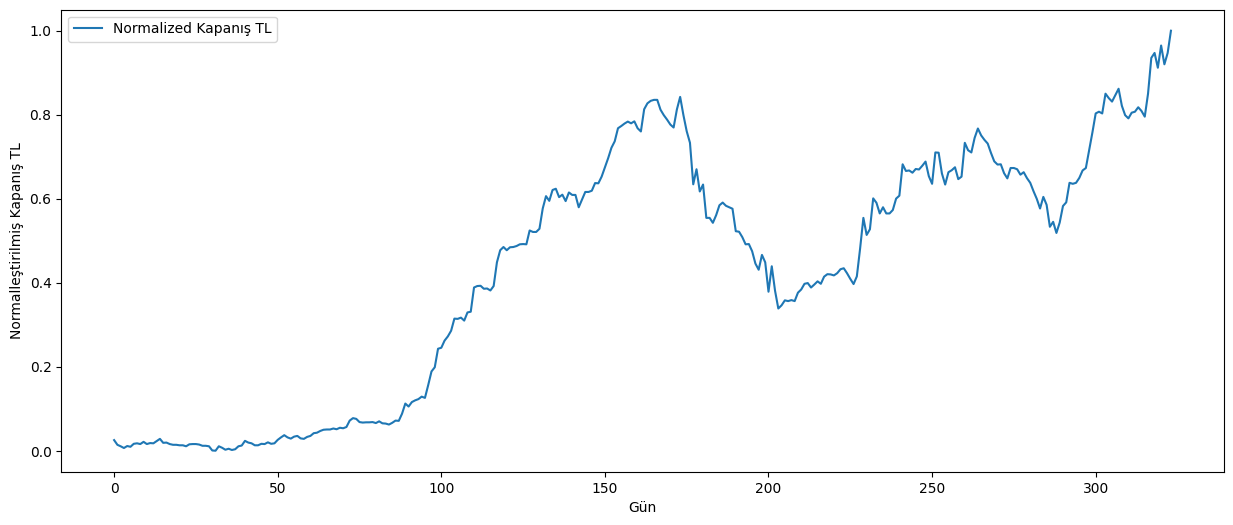

In [ ]:

plt.subplots(figsize=(15, 6))
plt.plot(dataset_train_scaled, label='Normalized Kapanış TL')
plt.xlabel("Gün")
plt.ylabel("Normalleştirilmiş Kapanış TL")
plt.legend()
plt.show()


## Creating X_train and y_train from Train data

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (274, 50)
Shape of y_train before reshape : (274,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (274, 50, 1)
Shape of y_train after reshape : (274, 1)


That means we have 228 rows, each row has 50 rows and 1 column


In [ ]:
X_train[0]

array([[0.02527925],
       [0.01410935],
       [0.01058201],
       [0.00646678],
       [0.0111699 ],
       [0.00940623],
       [0.01646091],
       [0.01763668],
       [0.01587302],
       [0.02116402],
       [0.01587302],
       [0.01822457],
       [0.01763668],
       [0.02292769],
       [0.02821869],
       [0.01881246],
       [0.01940035],
       [0.01587302],
       [0.01410935],
       [0.01410935],
       [0.01293357],
       [0.01293357],
       [0.01058201],
       [0.01528513],
       [0.01587302],
       [0.01587302],
       [0.01469724],
       [0.01175779],
       [0.01175779],
       [0.01058201],
       [0.00058789],
       [0.        ],
       [0.01058201],
       [0.00705467],
       [0.00235156],
       [0.00470312],
       [0.00176367],
       [0.00352734],
       [0.01058201],
       [0.01234568],
       [0.02351558],
       [0.01940035],
       [0.01763668],
       [0.01293357],
       [0.01293357],
       [0.01646091],
       [0.01587302],
       [0.019

In [ ]:
y_train[0]

array([0.02586714])

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
9/9 [==============================] - 5s 77ms/step - loss: 0.5986 - accuracy: 0.0036
Epoch 2/100
9/9 [==============================] - 1s 90ms/step - loss: 0.3812 - accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 1s 93ms/step - loss: 0.3942 - accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 1s 96ms/step - loss: 0.3885 - accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 1s 92ms/step - loss: 0.3126 - accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 1s 89ms/step - loss: 0.2821 - accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 1s 64ms/step - loss: 0.2831 - accuracy: 0.0036
Epoch 8/100
9/9 [==============================] - 0s 48ms/step - loss: 0.2509 - accuracy: 0.0036
Epoch 9/100
9/9 [==============================] - 0s 51ms/step - loss: 0.2160 - accuracy: 0.0036
Epoch 10/100
9/9 [==============================] - 0s 50ms/step - loss: 0.2071 - accuracy: 0.0036

In [ ]:
history.history["loss"]

[0.5985881686210632,
 0.38115179538726807,
 0.3941834568977356,
 0.38845789432525635,
 0.31255367398262024,
 0.28210386633872986,
 0.2831461429595947,
 0.25089767575263977,
 0.21596162021160126,
 0.20707783102989197,
 0.2338094562292099,
 0.23696504533290863,
 0.19411054253578186,
 0.18725088238716125,
 0.16204756498336792,
 0.17036016285419464,
 0.14611318707466125,
 0.15403065085411072,
 0.1387396901845932,
 0.11049163341522217,
 0.12363265454769135,
 0.12212079763412476,
 0.12034329771995544,
 0.1157592236995697,
 0.08840841054916382,
 0.10706648230552673,
 0.0927032083272934,
 0.09673261642456055,
 0.08909843116998672,
 0.08566830307245255,
 0.069280706346035,
 0.07503923028707504,
 0.08545295149087906,
 0.0681401863694191,
 0.0745149701833725,
 0.07337719202041626,
 0.06348557770252228,
 0.06172482296824455,
 0.05583598092198372,
 0.05553117021918297,
 0.061112869530916214,
 0.06293337792158127,
 0.0599471814930439,
 0.05496691167354584,
 0.04534208029508591,
 0.058946847915649414

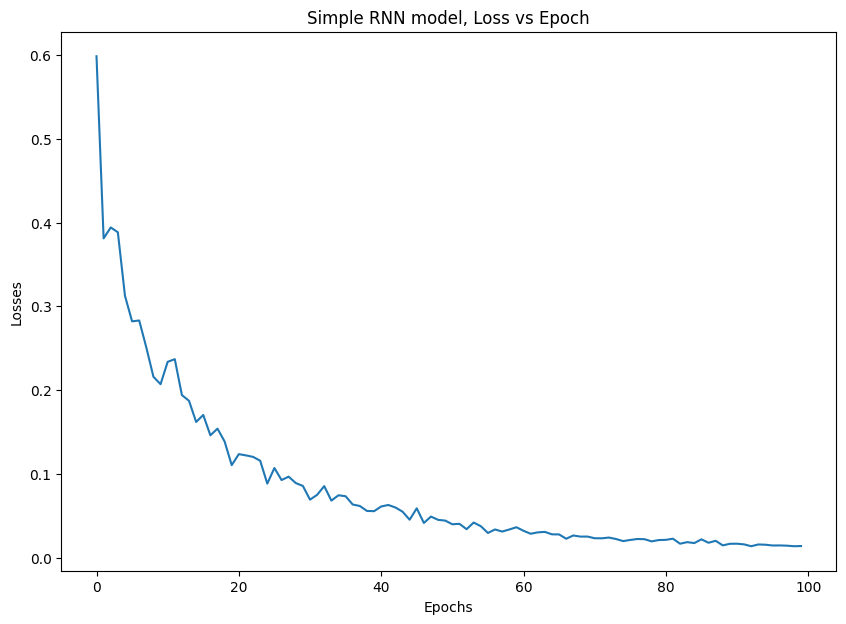

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

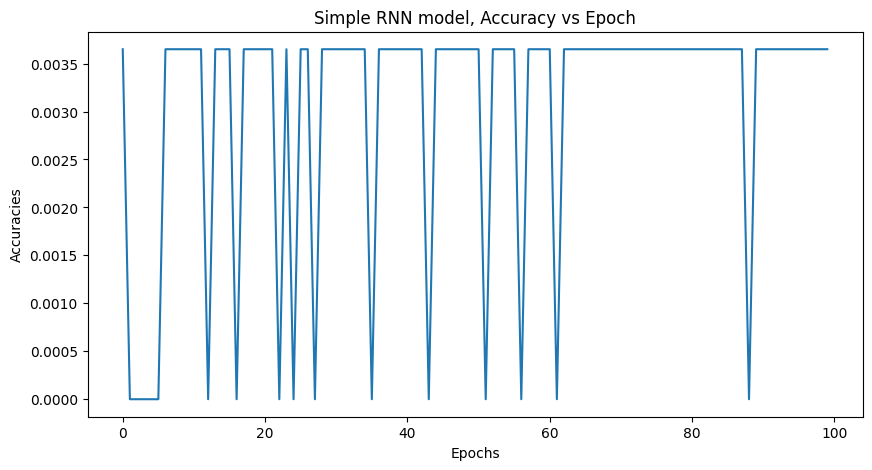

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data

In [ ]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

9/9 [==============================] - 1s 13ms/step


(274, 1)

In [ ]:

y_train = y_train.reshape(-1, 1)


In [ ]:
y_train = scaler.inverse_transform(y_train)

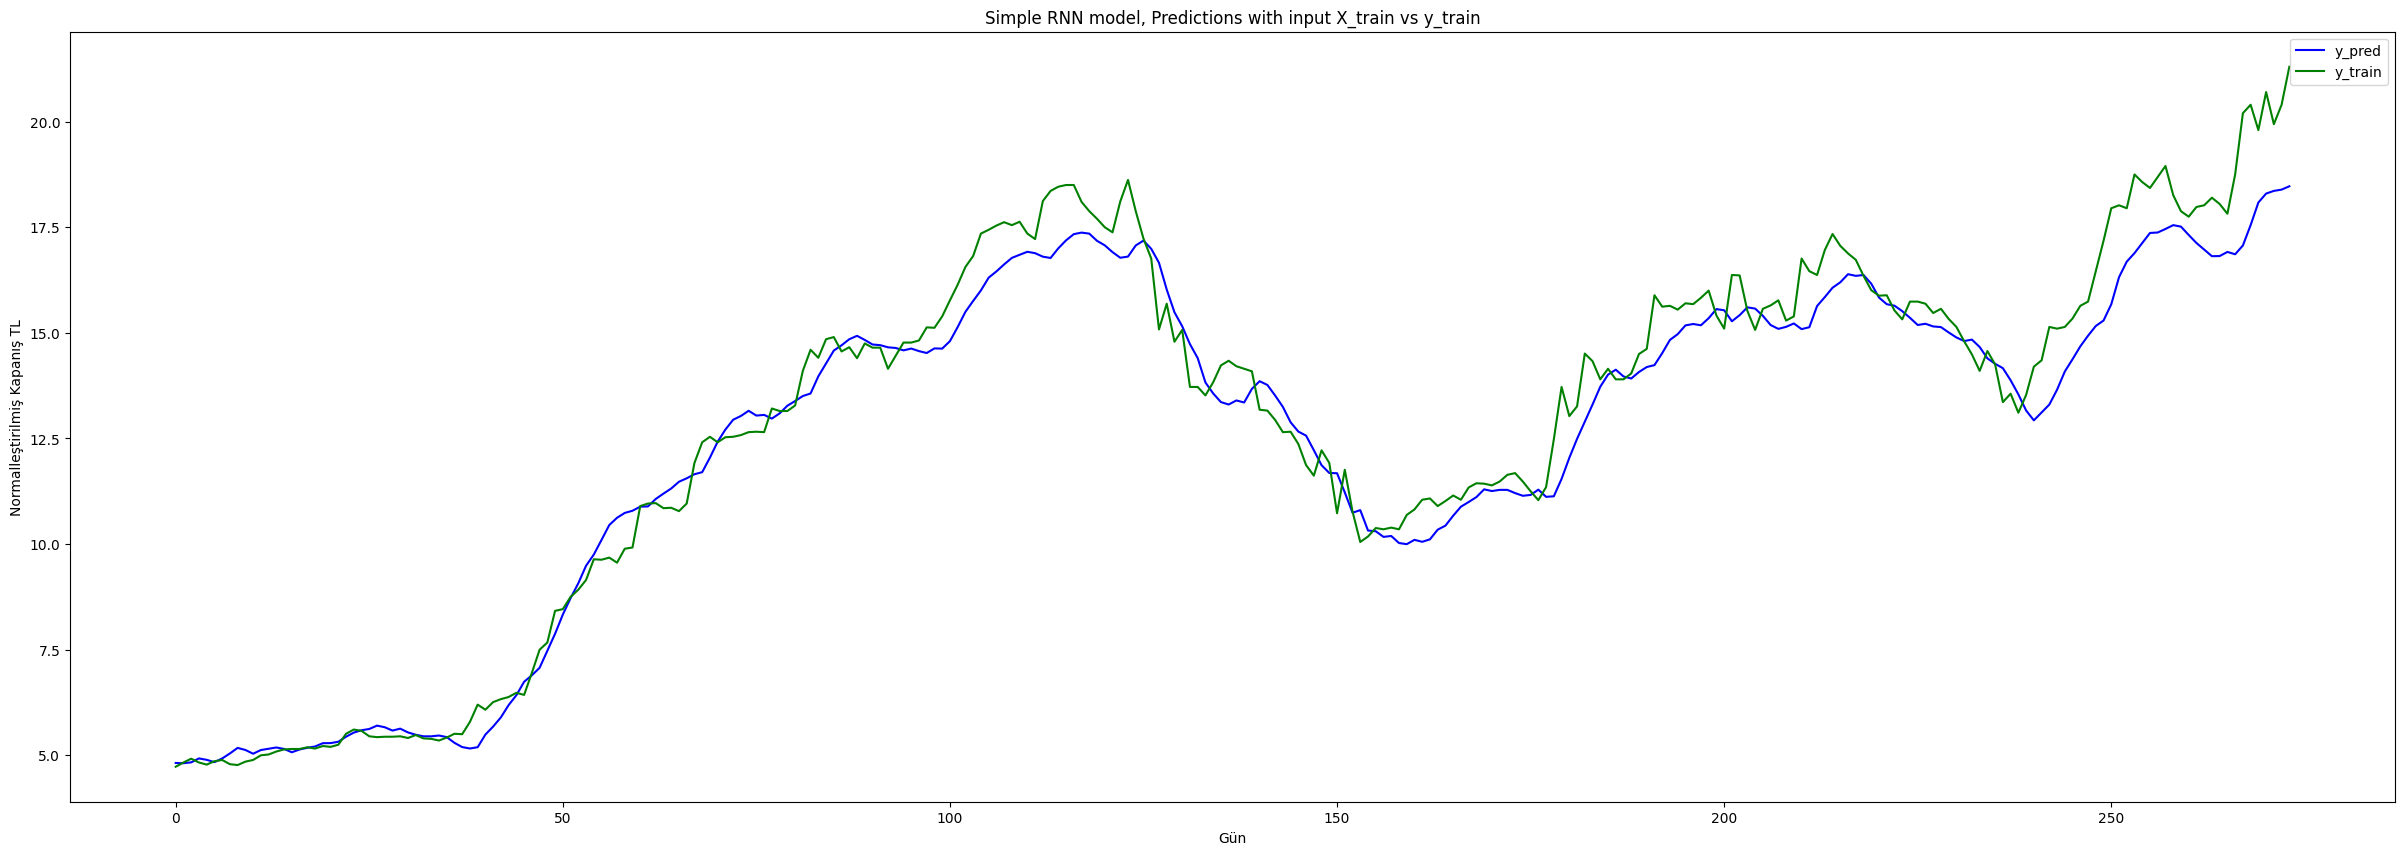

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Gün")
plt.ylabel("Normalleştirilmiş Kapanış TL")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

## Creating Test Dataset from Validation Data

In [ ]:
dataset_validation = validation_data.Kapanış.values  # getting "KAPANIŞ" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (139, 1)


 Creating X_test and y_test

In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

Converting to array

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (89, 50)
Shape of y_test before reshape : (89,)


Reshape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (89, 50, 1)
Shape of y_test after reshape : (89, 1)


## Evaluating with Validation Data

In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

3/3 [==============================] - 0s 17ms/step
Shape of y_pred_of_test : (89, 1)


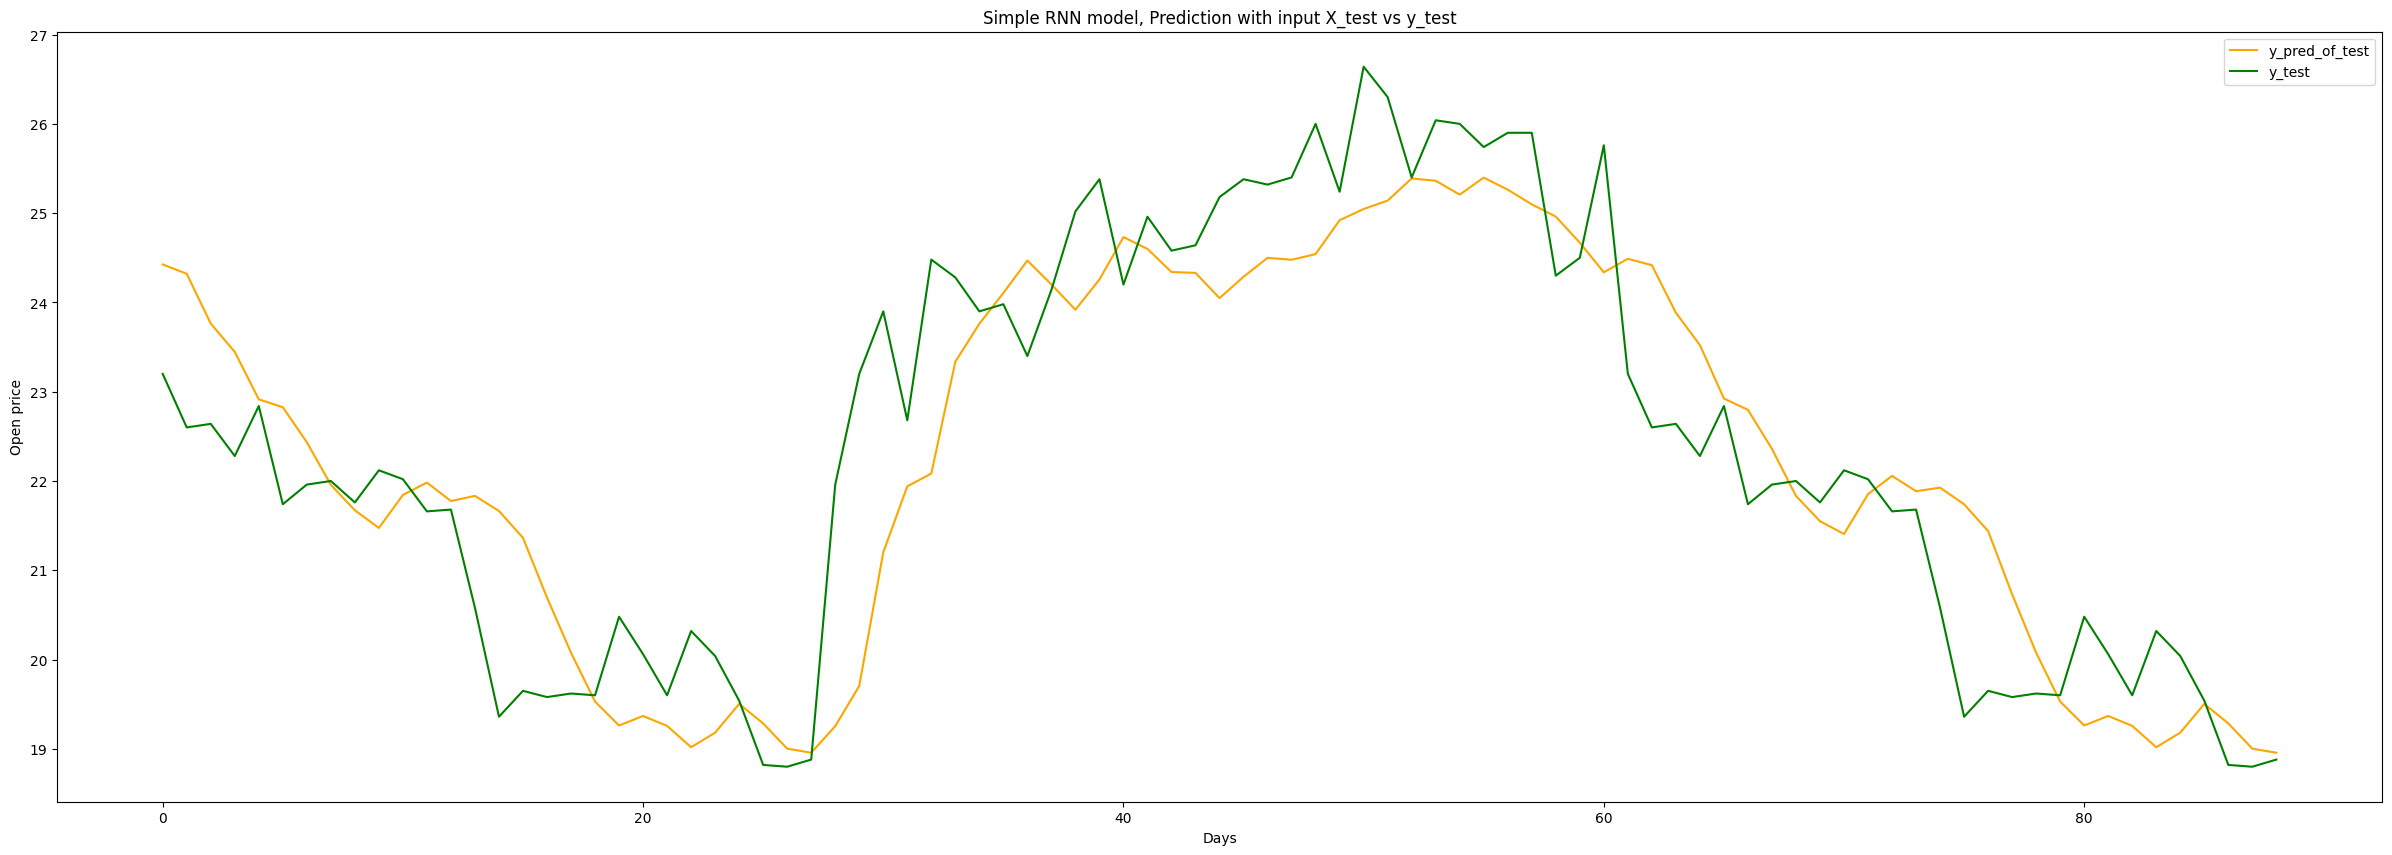

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

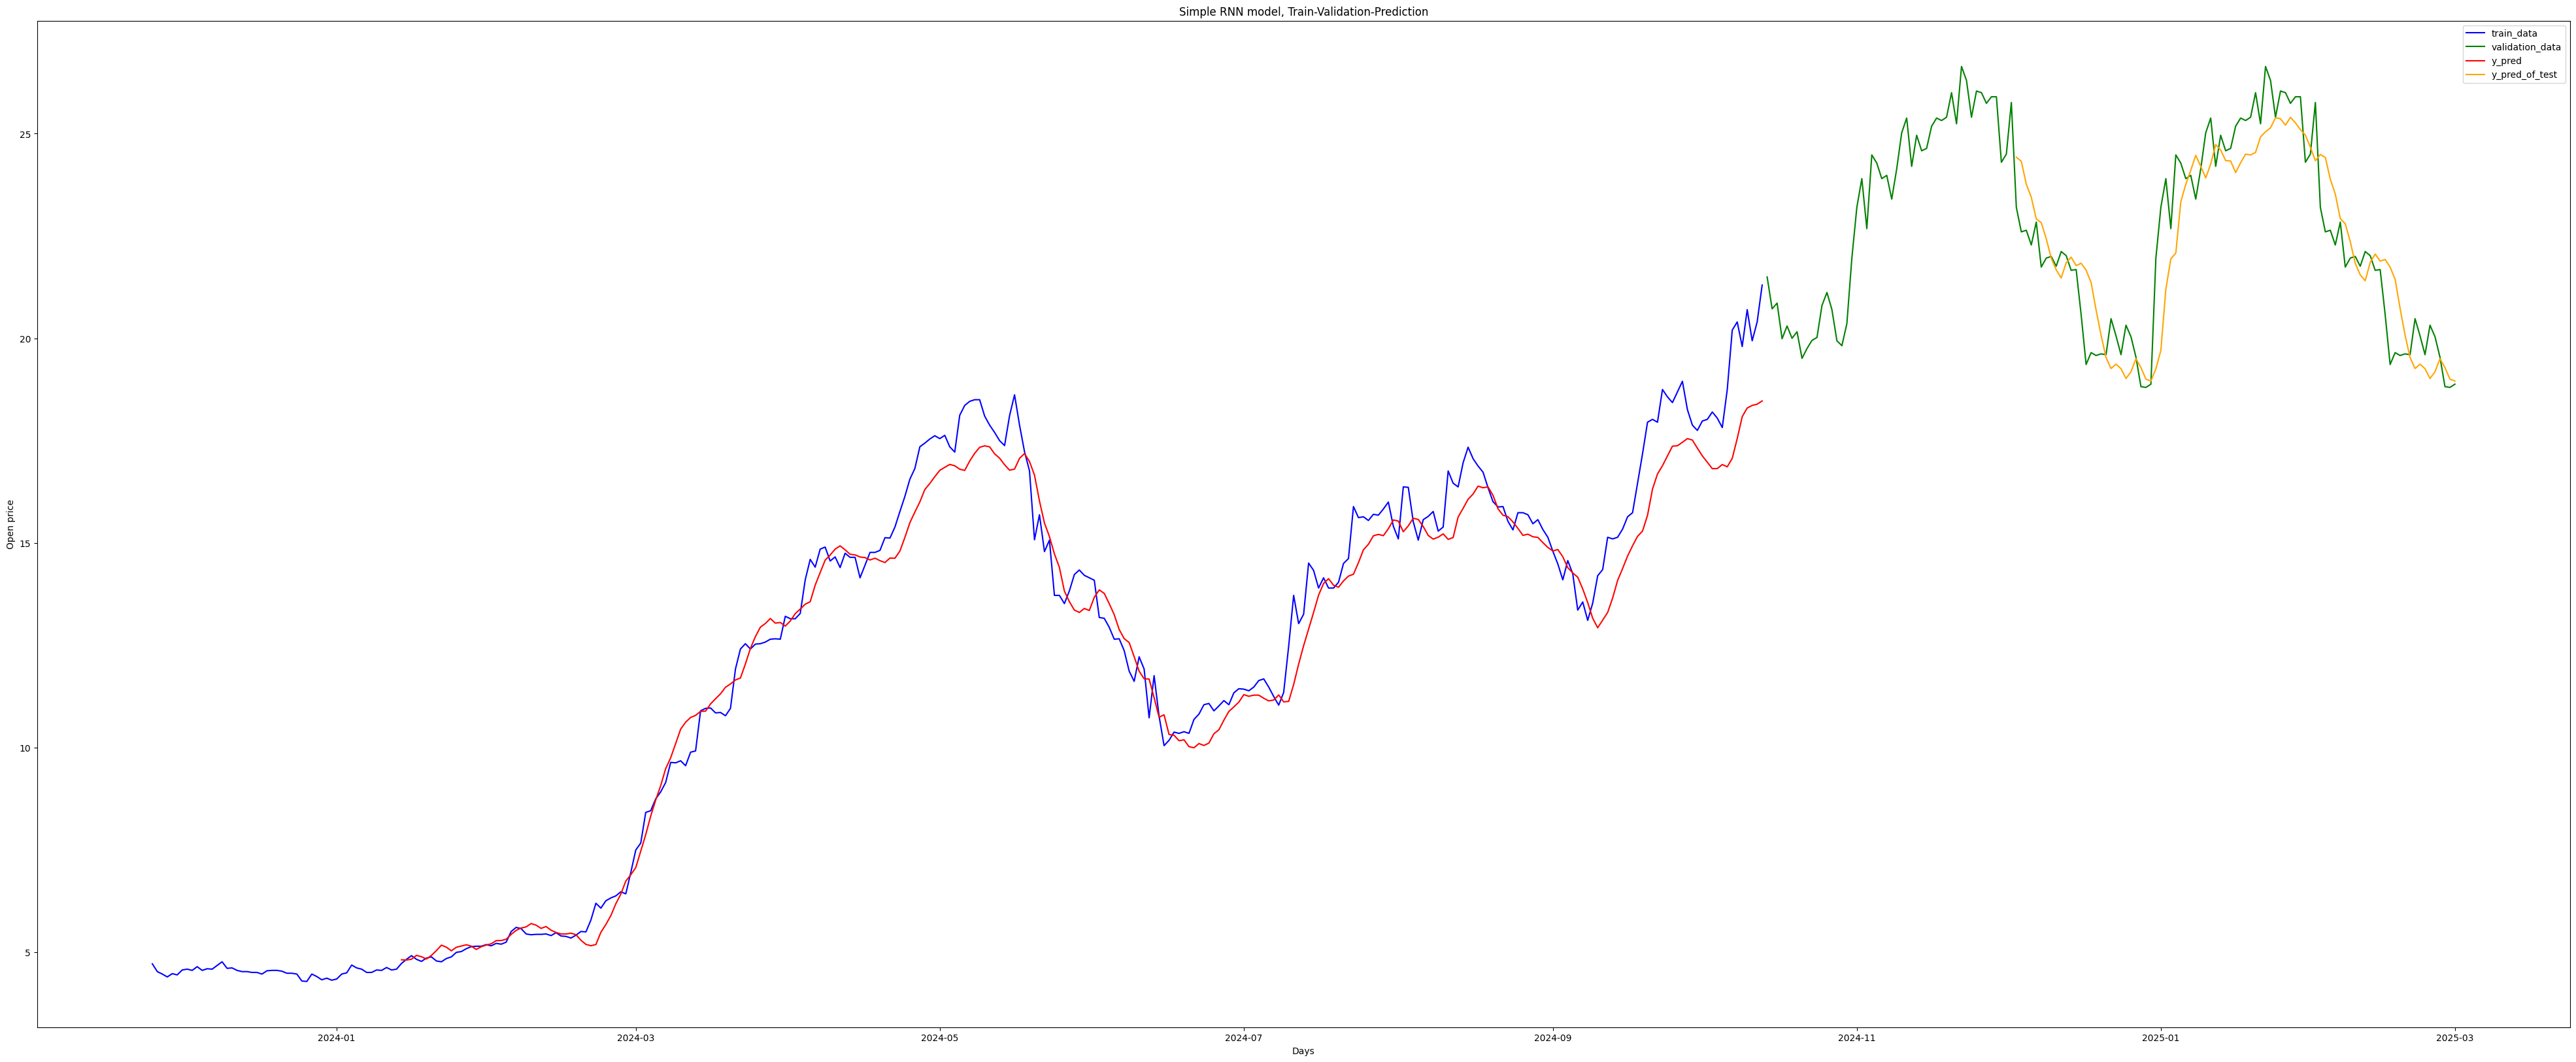

In [ ]:
# Visualisation
plt.subplots(figsize =(50,20))
plt.plot(train_data.Tarih, train_data.Kapanış, label = "train_data", color = "b")
plt.plot(validation_data.Tarih, validation_data.Kapanış, label = "validation_data", color = "g")
plt.plot(train_data.Tarih.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Tarih.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

## Creating LTSM Model

In [ ]:
y_train = scaler.fit_transform(y_train)


In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
28/28 [==============================] - 7s 47ms/step - loss: 0.0540 - accuracy: 0.0073
Epoch 2/10
28/28 [==============================] - 1s 48ms/step - loss: 0.0082 - accuracy: 0.0073
Epoch 3/10
28/28 [==============================] - 1s 48ms/step - loss: 0.0048 - accuracy: 0.0073
Epoch 4/10
28/28 [==============================] - 1s 49ms/step - loss: 0.0041 - accuracy: 0.0073
Epoch 5/10
28/28 [==============================] - 1s 47ms/step - loss: 0.0042 - accuracy: 0.0073
Epoch 6/10
28/28 [==============================] - 2s 59ms/step - loss: 0.0031 - accuracy: 0.0073
Epoch 7/10
28/28 [==============================] - 2s 77ms/step - loss: 0.0028 - accuracy: 0.0073
Epoch 8/10
28/28 [==============================] - 2s 71ms/step - loss: 0.0029 - accuracy: 0.0073
Epoch 9/10
28/28 [==============================] - 1s 47ms/step - loss: 0.0030 - accuracy: 0.0073
Epoch 10/10
28/28 [==============================] - 1s 47ms/step - loss: 0.0029 - accuracy: 0.0073


## Evaluating LSTM Model

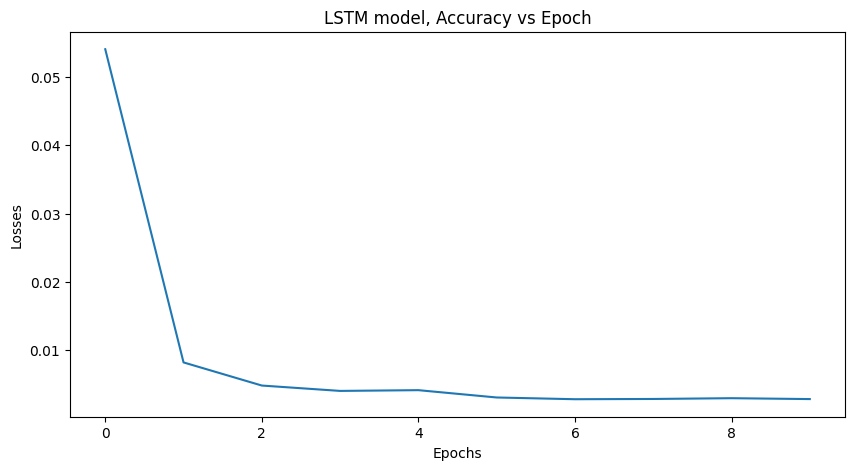

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

3/3 [==============================] - 1s 18ms/step


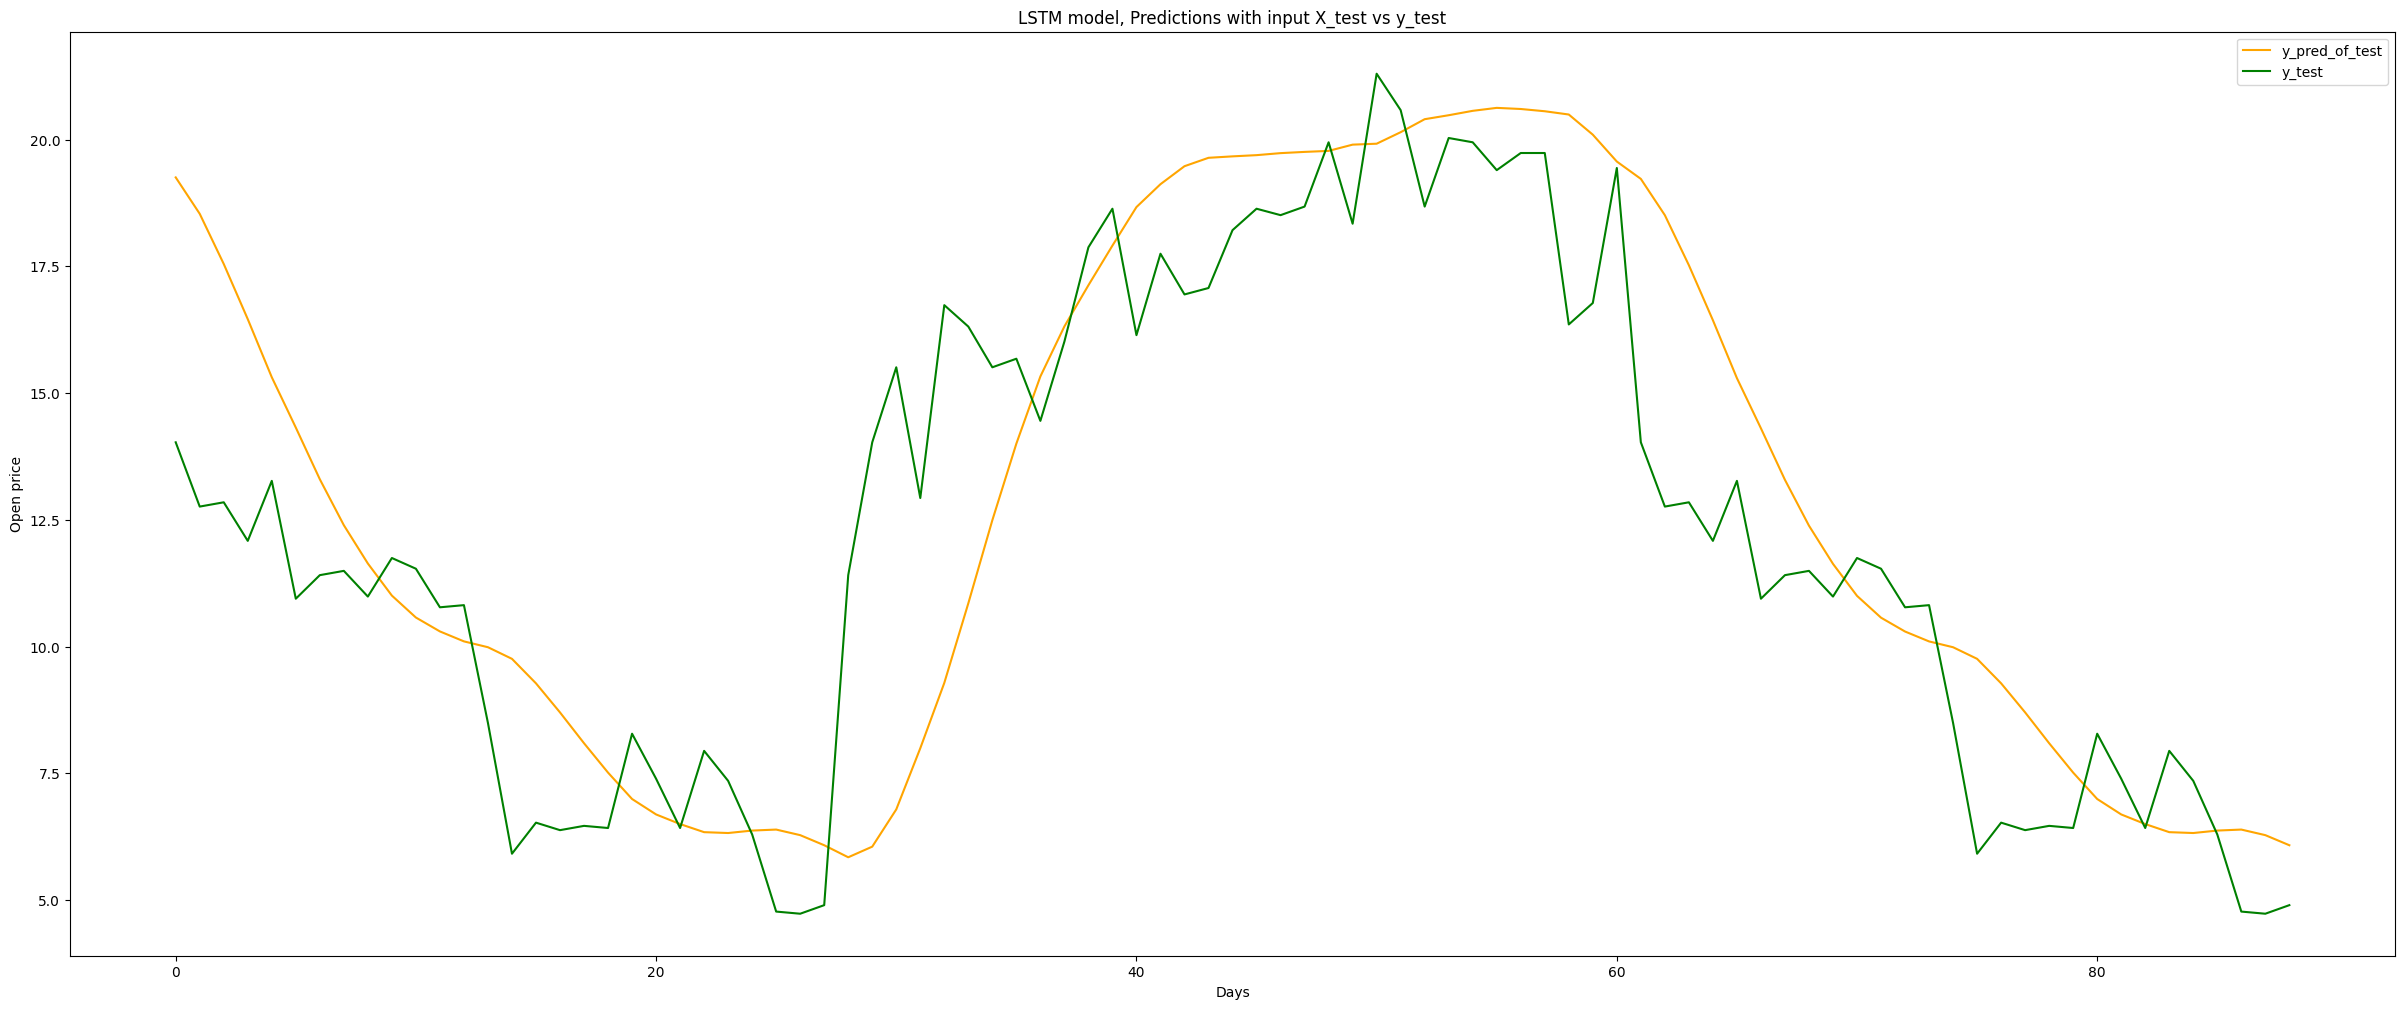

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

## Future price prediction

In [ ]:
data.iloc[-1]

Tarih                   2025-03-01 00:00:00
Kapanış                               18.88
Min(TL)                               18.23
Max(TL)                               19.08
AOF(TL)                               18.67
Hacim(TL)                          31642678
Sermaye(mn TL)                          224
USDTRY                              28.9073
BIST 100                               8026
PiyasaDeğeri(mn TL)                    4229
PiyasaDeğeri(mn USD)                    146
HalkaAçık PD(mn TL)                  2162.0
HalkaAçık PD(mn USD)                    NaN
Name: 462, dtype: object

In [ ]:
X_input = data.iloc[-time_step:].Kapanış.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.83928571],
        [0.68877551],
        [0.78571429],
        [0.7372449 ],
        [0.74489796],
        [0.81377551],
        [0.83928571],
        [0.83163265],
        [0.84183673],
        [0.91836735],
        [0.82142857],
        [1.        ],
        [0.95663265],
        [0.84183673],
        [0.92346939],
        [0.91836735],
        [0.88520408],
        [0.90561224],
        [0.90561224],
        [0.70153061],
        [0.72704082],
        [0.8877551 ],
        [0.56122449],
        [0.48469388],
        [0.48979592],
        [0.44387755],
        [0.51530612],
        [0.375     ],
        [0.40306122],
        [0.40816327],
        [0.37755102],
        [0.42346939],
        [0.41071429],
        [0.36479592],
        [0.36734694],
        [0.22704082],
        [0.07142857],
        [0.10841837],
        [0.0994898 ],
        [0.10459184],
        [0.10204082],
        [0.21428571],
        [0.16071429],
        [0.10204082],
        [0.19387755],
        [0

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 02/03/2025      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 02/03/2025 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 29ms/step
Simple RNN, Open price prediction for 02/03/2025      : 19.25456
LSTM prediction, Open price prediction for 02/03/2025 : 19.326822


1/1 [==============================] - 0s 37ms/step
           Simple_RNN_Prediction LSTM_Prediction
2025-02-01              19.25456       19.326822
2025-02-02              19.25456       19.326822
2025-02-03              19.25456       19.326822
2025-02-04              19.25456       19.326822
2025-02-05              19.25456       19.326822
2025-02-06              19.25456       19.326822
2025-02-07              19.25456       19.326822
2025-02-08              19.25456       19.326822
2025-02-09              19.25456       19.326822
2025-02-10              19.25456       19.326822
2025-02-11              19.25456       19.326822
2025-02-12              19.25456       19.326822
2025-02-13              19.25456       19.326822
2025-02-14              19.25456       19.326822
2025-02-15              19.25456       19.326822
2025-02-16              19.25456       19.326822
2025-02-17              19.25456       19.326822
2025-02-18              19.25456       19.326822
2025-02-19       

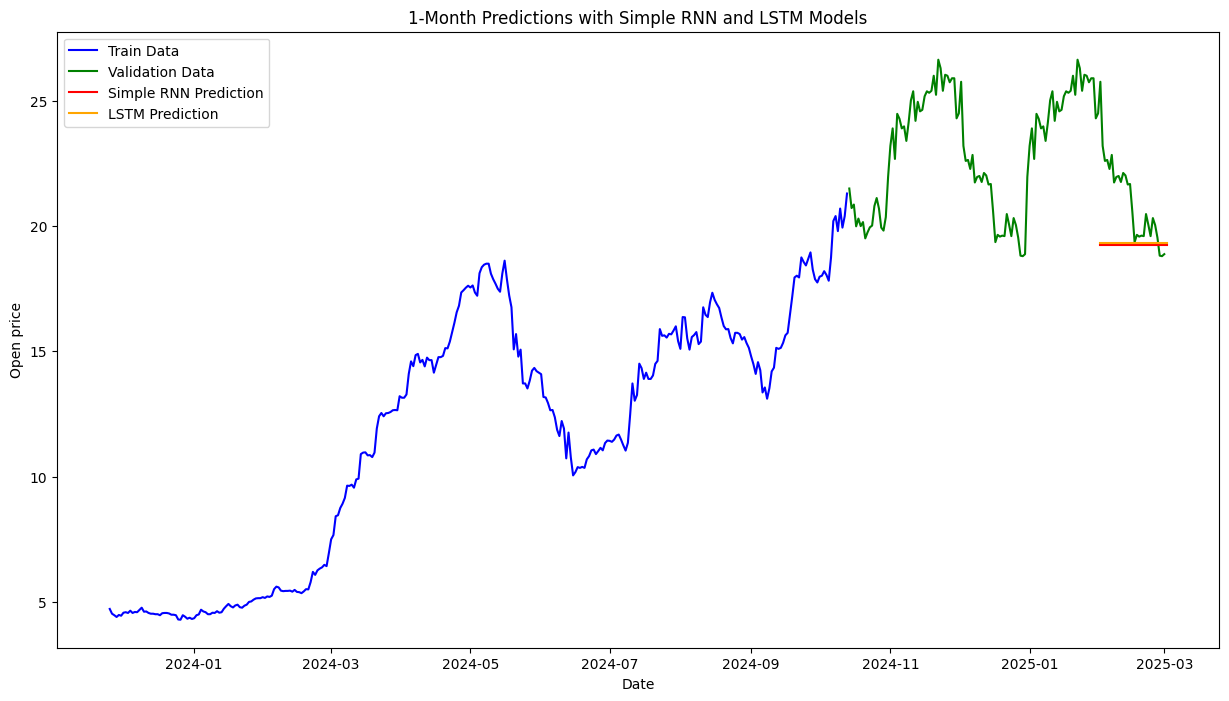

In [ ]:
import datetime

# Tahmin yapılacak tarih
target_date = datetime.datetime(2025, 3, 2)

# 1 aylık süre boyunca tarihleri oluşturun
date_range = pd.date_range(end=target_date, periods=30, freq='D')

# Tarihleri ve tahminleri saklamak için bir DataFrame oluşturun
predictions_df = pd.DataFrame(index=date_range, columns=['Simple_RNN_Prediction', 'LSTM_Prediction'])

# Her bir tarih için tahmin yapın ve DataFrame'e ekleyin
for date in date_range:
    # Tarihi modele uygun formatta hazırlayın
    formatted_date = date.strftime('%Y-%m-%d')

    # Tahmin yapın
    simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
    LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))

    # DataFrame'e tahminleri ekleyin
    predictions_df.loc[date, 'Simple_RNN_Prediction'] = simple_RNN_prediction[0, 0]
    predictions_df.loc[date, 'LSTM_Prediction'] = LSTM_prediction[0, 0]

# DataFrame'i yazdırın
print(predictions_df)

# Görselleştirmeyi yapın
plt.figure(figsize=(15, 8))
plt.plot(train_data['Tarih'], train_data['Kapanış'], label='Train Data', color='b')
plt.plot(validation_data['Tarih'], validation_data['Kapanış'], label='Validation Data', color='g')
plt.plot(predictions_df.index, predictions_df['Simple_RNN_Prediction'], label='Simple RNN Prediction', color='r')
plt.plot(predictions_df.index, predictions_df['LSTM_Prediction'], label='LSTM Prediction', color='orange')
plt.xlabel("Date")
plt.ylabel("Open price")
plt.title("1-Month Predictions with Simple RNN and LSTM Models")
plt.legend()
plt.show()


9/9 [==============================] - 0s 17ms/step


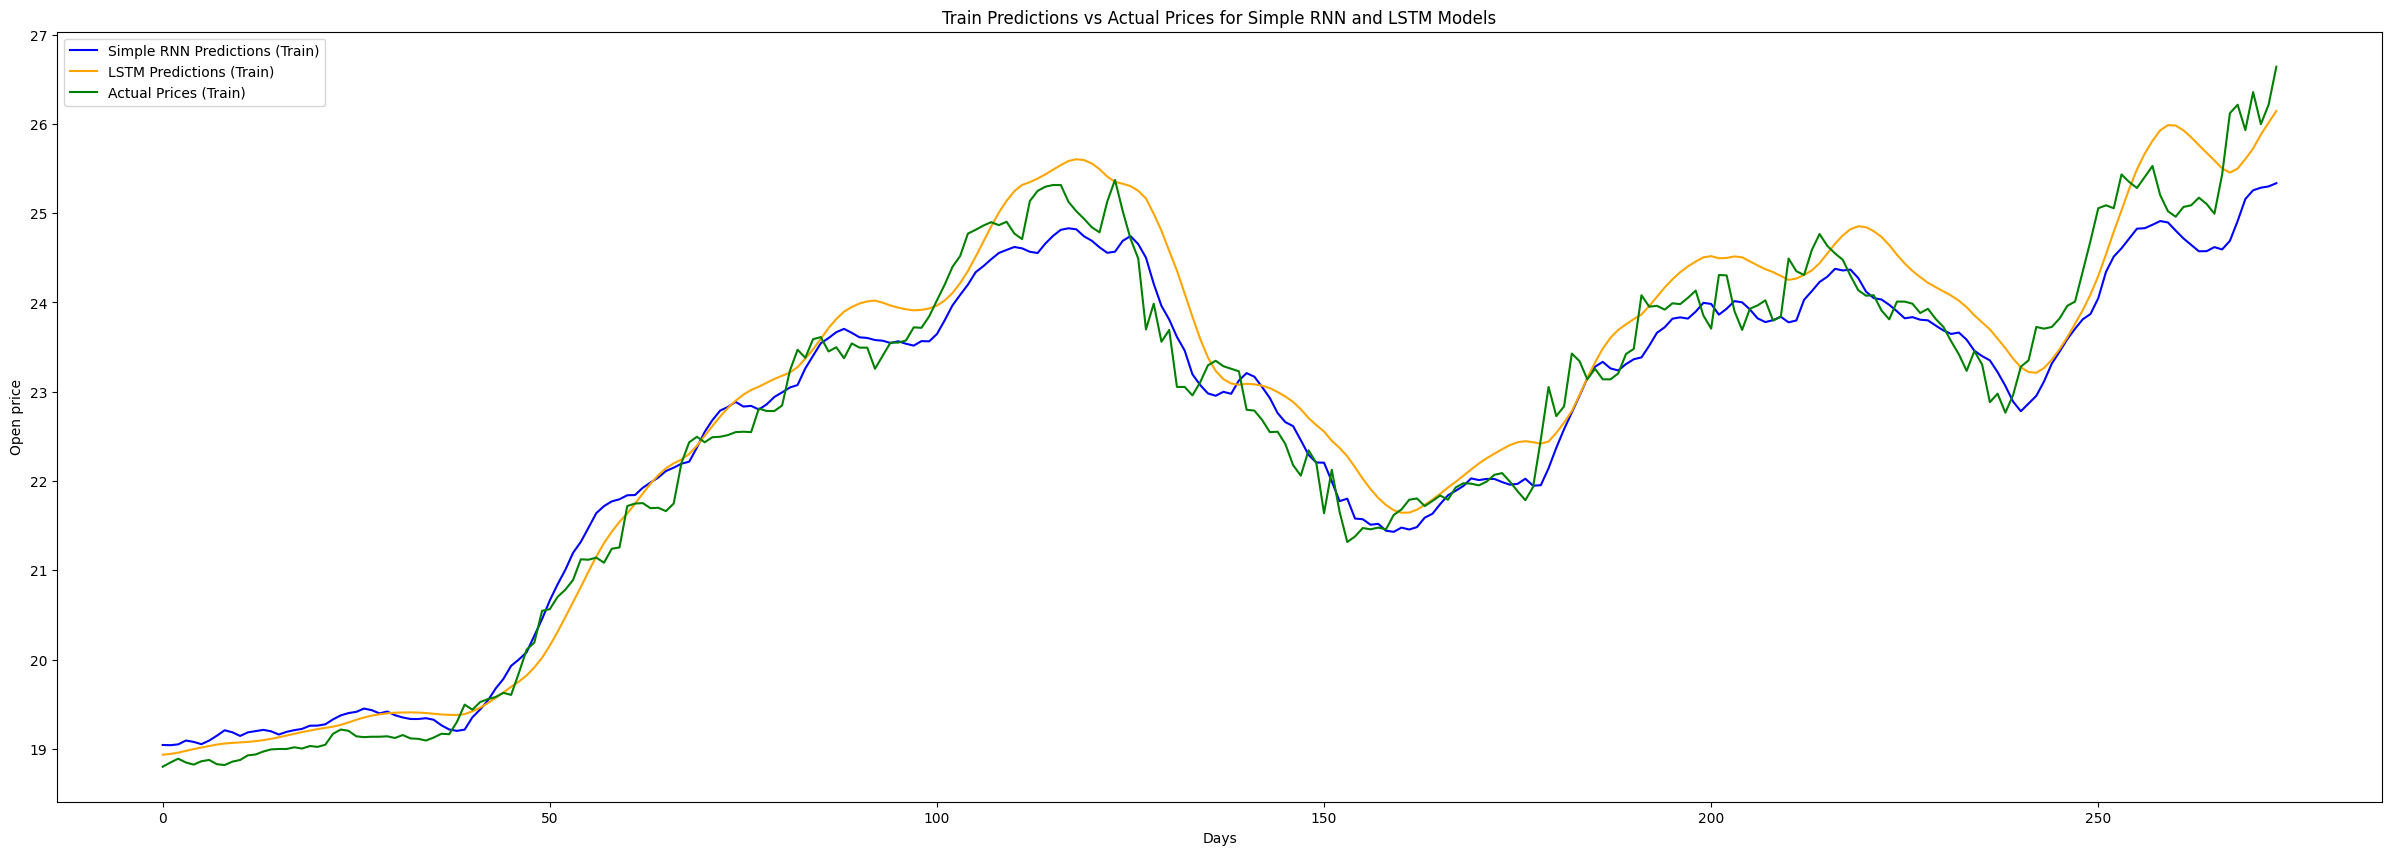

In [ ]:
# Eğitim verileri üzerinde tahminler
y_pred_rnn_train = scaler.inverse_transform(regressor.predict(X_train))
y_pred_lstm_train = scaler.inverse_transform(model_lstm.predict(X_train))

# Görselleştirme
plt.subplots(figsize=(30, 10))
plt.plot(y_pred_rnn_train, label="Simple RNN Predictions (Train)", color="b")
plt.plot(y_pred_lstm_train, label="LSTM Predictions (Train)", color="orange")
plt.plot(scaler.inverse_transform(y_train), label="Actual Prices (Train)", color="g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Train Predictions vs Actual Prices for Simple RNN and LSTM Models")
plt.legend()
plt.show()




## ARIMA MODELİ


In [8]:
from statsmodels.tsa.stattools import adfuller

# ADF testi
result = adfuller(data['Kapanış'])
print('ADF Statistik:', result[0])
print('p-value:', result[1])
print('Kritik Değerler:', result[4])


ADF Statistik: -1.6758490167269717
p-value: 0.4435967692750309
Kritik Değerler: {'1%': -3.444900499925237, '5%': -2.8679556266351653, '10%': -2.570187288941969}


In [9]:
veri_diff = data['Kapanış'].diff().dropna()

# ADF testi
result_diff = adfuller(veri_diff)
print('ADF Statistik (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Kritik Değerler (Differenced):', result_diff[4])


ADF Statistik (Differenced): -5.176010241123175
p-value (Differenced): 9.839677749796469e-06
Kritik Değerler (Differenced): {'1%': -3.444900499925237, '5%': -2.8679556266351653, '10%': -2.570187288941969}


<Figure size 1200x600 with 0 Axes>

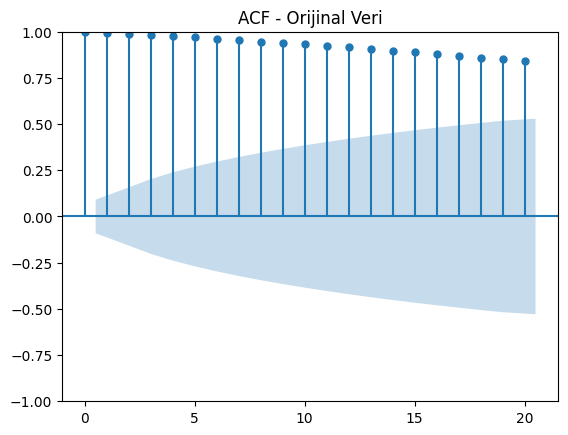

<Figure size 1200x600 with 0 Axes>

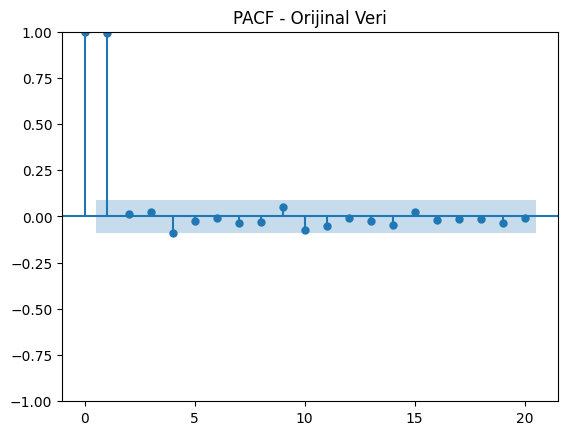

<Figure size 1200x600 with 0 Axes>

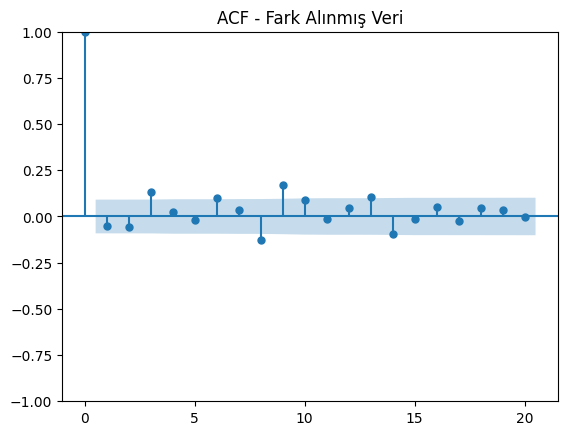

<Figure size 1200x600 with 0 Axes>

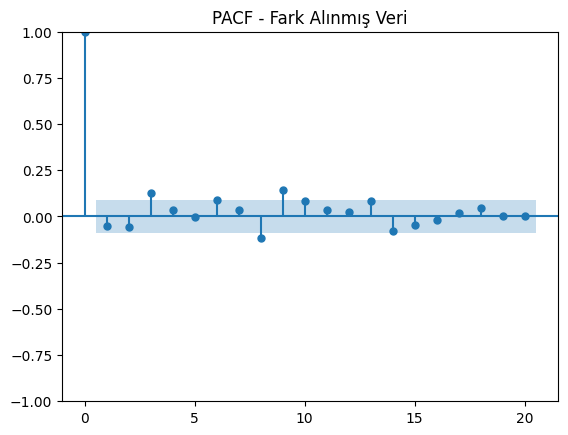

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Orijinal veri
plt.figure(figsize=(12, 6))
plot_acf(data['Kapanış'], lags=20, title='ACF - Orijinal Veri')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Kapanış'], lags=20, title='PACF - Orijinal Veri')
plt.show()

# Fark alınmış veri
plt.figure(figsize=(12, 6))
plot_acf(veri_diff, lags=20, title='ACF - Fark Alınmış Veri')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(veri_diff, lags=20, title='PACF - Fark Alınmış Veri')
plt.show()


In [22]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Veri çerçevesinin 'Kapanış' sütununu kullanarak ARIMA modellerini değerlendir
for i in range(1, 7):
    for j in range(1, 7):
        model = ARIMA(data['Kapanış'], order=(i, 0, j))
        result = model.fit()
        print(f"AIC: {result.aic}, Order of AR: {i}, Order of MA: {j}")


AIC: 753.1532967637232, Order of AR: 1, Order of MA: 1
AIC: 754.4664054005484, Order of AR: 1, Order of MA: 2
AIC: 748.6176358857198, Order of AR: 1, Order of MA: 3
AIC: 750.0658663066952, Order of AR: 1, Order of MA: 4
AIC: 752.0133358940561, Order of AR: 1, Order of MA: 5
AIC: 752.6915481009503, Order of AR: 1, Order of MA: 6
AIC: 751.4073695374045, Order of AR: 2, Order of MA: 1
AIC: 751.1205806363133, Order of AR: 2, Order of MA: 2
AIC: 749.8151979725662, Order of AR: 2, Order of MA: 3
AIC: 752.1267344452974, Order of AR: 2, Order of MA: 4
AIC: 751.7154802941902, Order of AR: 2, Order of MA: 5
AIC: 754.6726198532276, Order of AR: 2, Order of MA: 6
AIC: 751.1834639129916, Order of AR: 3, Order of MA: 1
AIC: 741.1677568824291, Order of AR: 3, Order of MA: 2
AIC: 748.9415443040167, Order of AR: 3, Order of MA: 3
AIC: 749.1691314886327, Order of AR: 3, Order of MA: 4
AIC: 746.9988573070632, Order of AR: 3, Order of MA: 5
AIC: 742.5536485721755, Order of AR: 3, Order of MA: 6
AIC: 746.0

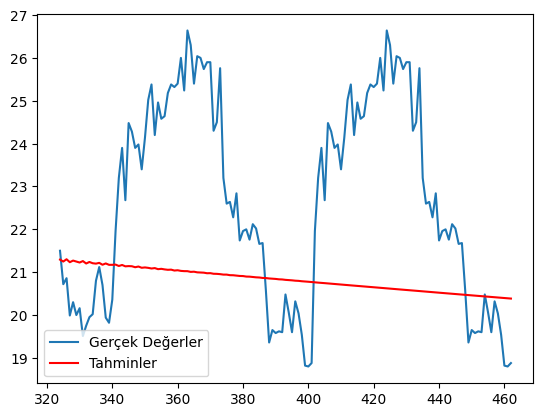

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Veriyi eğitim ve test kümelerine böl
train_size = int(len(data) * 0.7)
train, test = data['Kapanış'][:train_size], data['Kapanış'][train_size:]

# En iyi AIC değerine sahip modelin order değerleri
best_order = (3, 0, 2)

# ARIMA modelini oluştur
best_model = ARIMA(train, order=best_order)

# Modeli eğit
best_model_fit = best_model.fit()

# Test verileri üzerinde tahmin yap
predictions = best_model_fit.forecast(steps=len(test))

# Gerçek ve tahmin edilen değerleri görselleştir
plt.plot(test.index, test, label='Gerçek Değerler')
plt.plot(test.index, predictions, label='Tahminler', color='red')
plt.legend()
plt.show()

